## Final Project Submission
* Student name: Stephen Cibik
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL: https://foamofthesea.github.io/working_with_the_king_county_housing_dataset


## First a look at the data:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### We can check for missing values by using .info()
 - There are also just a few missing from 'view'

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### I will use the 'id' feature to check if there are houses that sold more than once:

In [257]:
print('Number of unique house IDs:', df.id.nunique())
print('Total number of sales', len(df))

Number of unique house IDs: 21420
Total number of sales 21597


Since there are fewer IDs than total sales, we know that some of the houses were sold more than once.

## A guide to column contents:
NOTE: There appears to be some discrepancy on what some of these columns actually mean on the internet. Some say that the values with the suffix -15 are the square footage values for the house in 2015, possibly indicating renovation or modification. However, the supplied 'column_names.md' in the repository for this project describes them as being the average values for the nearest 15 neighbors to the house. I will go with the latter definition.
 - id: identification number for a house
 - date: date the house was sold
 - price: the prediction target, how much the house sold for
 - bedrooms: # of bedrooms in the house
 - bathrooms: # of bathrooms in the house
 - sqft_living: square footage of the home
 - sqft_lot: square footage of the lot
 - floors: total number of levels in the house
 - waterfront: house which has a view to a waterfront
 - view: # of times house has been viewed
 - condition: how good the overall condition is on a scale between 1-5
 - grade: overall grade given to house by King County grading system (1-13)
 - sqft_above: square footage of house apart from basement
 - sqft_basement: square footage of the basement
 - yr_built: year house was built
 - yr_renovated: year when house was renovated (will be 0 if N/A)
 - zipcode: the zipcode for the house
 - lat: latitude coordinate
 - long: longitude coordinate
 - sqft_living15: internal living space of nearest 15 neighboors
 - sqft_lot15: lot size of nearest 15 neighbors

In [258]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


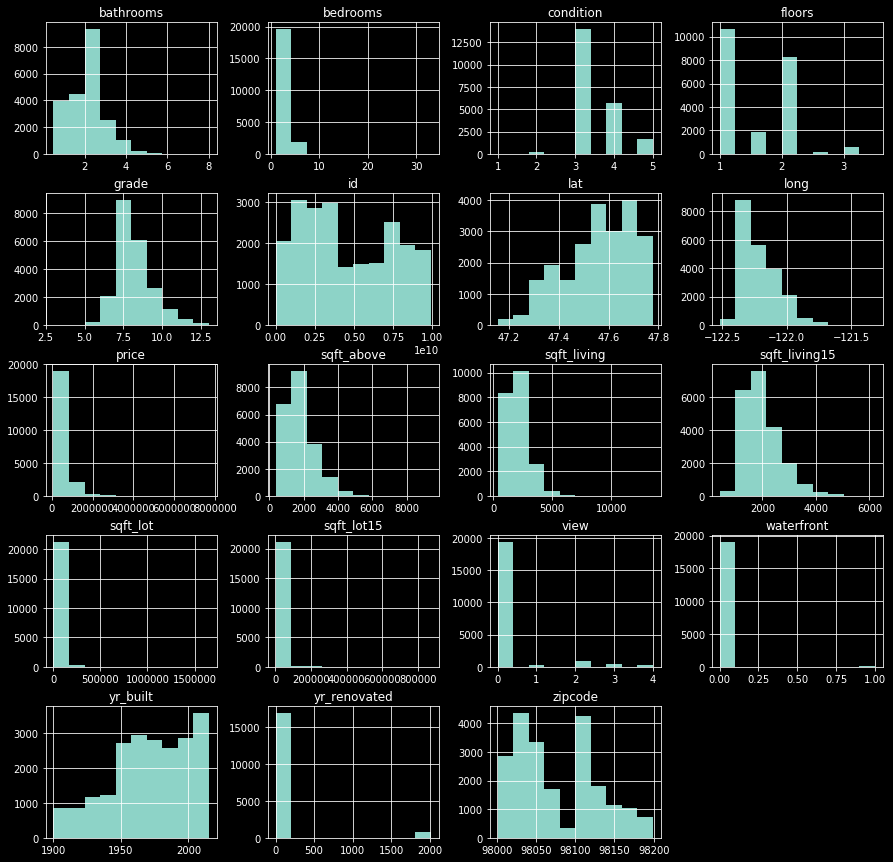

In [259]:
df.hist(figsize=(15,15));

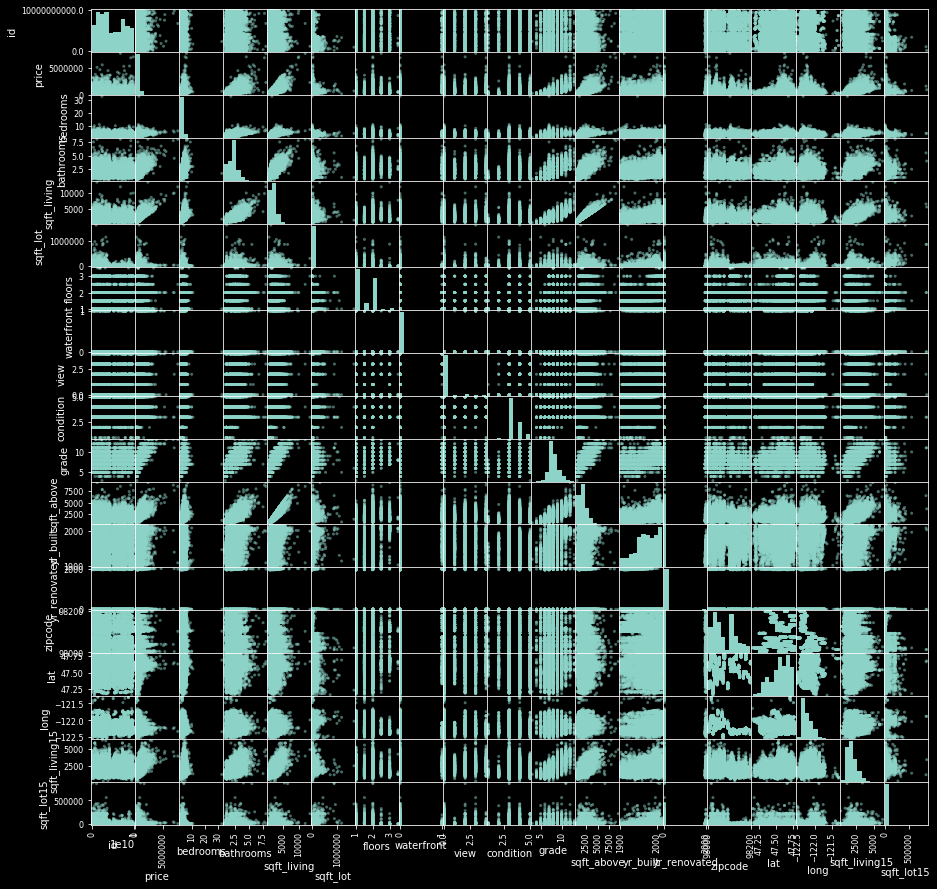

In [35]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

## Notes from Scatter Matrix:
### On correlations:
 - Clear positive correlation btw sqft_above, bathrooms, grade, and sqft_living
 - The same thing can be seen with price: bathrooms and sqft_living seem more important than the number of bedrooms
 - Price appears to be correlated with sqft_living, sqft_living15, sqft_above, grade, bathrooms, and with lat

### On distributions:
 - Few of the features are normally distributed from the start, some transformation may be helpful.
 - Price looks like it will certainly need a log/sqrt transform to normalize
 - Right away I can see that the grade is close to normally distributed already. This may be a result of how the scoring was done by King County.
 - Distributions which have positive skew and look like they may benefit from log transformation include:
     - bathrooms
     - floors
     - sqft_living
     - sqft_above
     - zipcode?
     - long
     - sqft_living15
 - lat also has a normalish distribution with negative skew

## We can use Pandas to look at Pearson correlation coefficients between our raw features, and Seaborn to produce a heatmap:

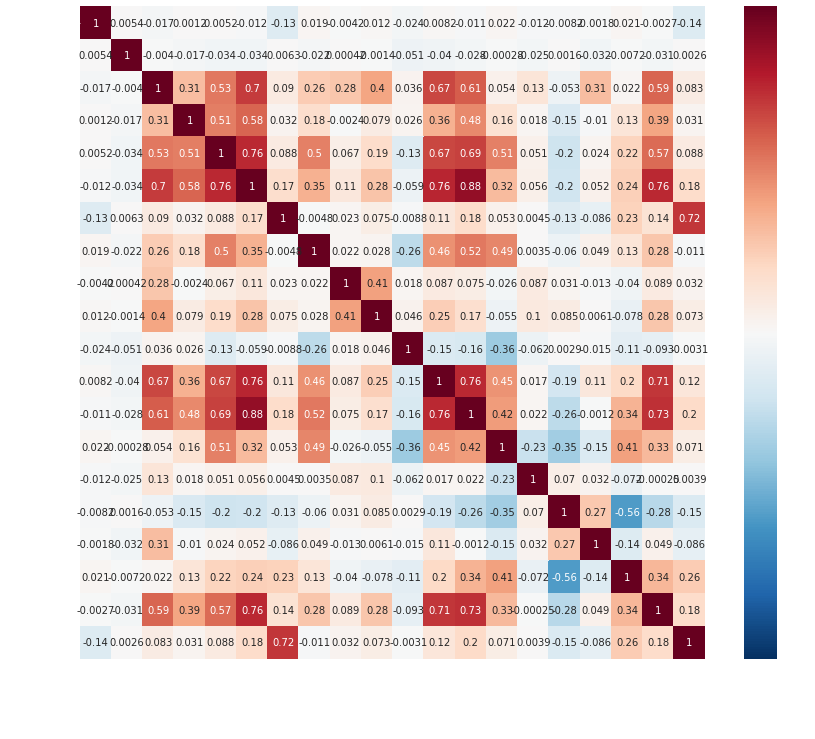

In [39]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Despite the fact that we can already see strong colinearity between some variables, I am going to leave them all in for now, then later drop based on p-values.

# Data Cleaning:

## Fixing sqft_basement:
 - This column has an object datatype, caused by '?' notation for its NaN values. These missing values can be calculated by subtracting the sqft_above column from the sqft_living column, and may still prove to be a valuable predictor.

In [2]:
df[['sqft_living','sqft_above','sqft_basement']].head()

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0


In [3]:
df[df['sqft_basement']=='?'][['sqft_living','sqft_above','sqft_basement']].head()

,sqft_living,sqft_above,sqft_basement
6,1715,1715,?
18,1200,1200,?
42,3595,3595,?
79,3450,3450,?
112,1540,1160,?


In [4]:
#Check number of ?'s
df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [5]:
#create new column by subtracting
df['sqft_basement2'] = df.sqft_living - df.sqft_above
df.sqft_basement2.head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement2, dtype: int64

In [6]:
#replace ?'s with numbers so the column can be converted to numeric for comparison
df.loc[df['sqft_basement']=='?',['sqft_basement']] = '99999'
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement2 = df.sqft_basement2.astype('float64')

### I will check to see if there are any discrepancies in calculated sqft_basement values with the given ones, if there are none I will drop the old column for the new one.
There number of discrepancies between the newly calculated column and the old column should be equal to the number of '?'s in the original column to indicate that all calculated values agree with data that was given.

In [7]:
df['error_check'] = np.where(df['sqft_basement']==df['sqft_basement2'], True, False)
df.error_check.head()

0    True
1    True
2    True
3    True
4    True
Name: error_check, dtype: bool

In [8]:
print('Discrepancies between new column and orignial:',len(df) - df.error_check.sum())
print('Original number of missing values in sqft_basement:',len(df[df['sqft_basement']==99999]))

Discrepancies between new column and orignial: 454
Original number of missing values in sqft_basement: 454


## We see that there are the same number of discrepancies with the new basement sqare footage values as there were missing values in the original dataset.
 - this means that there were no discrepancies with known values. This means the old column can be replaced entirely with the newly calculated column.

In [9]:
df.drop(columns=['sqft_basement','error_check'], inplace=True)

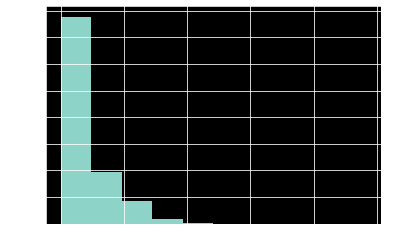

In [10]:
df.sqft_basement2.hist()

## Since sqft_basement2 is mostly an indicator of whether a house has a basement or not, I am going to turn it into a binary categorical variable.

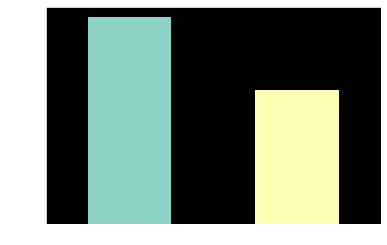

In [11]:
basement_bins = [-1,1,7000]
labels = ['0','1']

df['has_basement'] = pd.cut(df['sqft_basement2'], basement_bins, labels=labels)
df['has_basement'].value_counts().plot(kind='bar')

In [12]:
df.drop(columns=['sqft_basement2'], inplace=True)

## Before I move forward in data cleaning, I want to see if there is a relationship between houses that sold more than once and the year they were renovated:

In [13]:
dups = df[df.id.duplicated(keep=False)]
dups.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,1943,0.0,98178,47.4897,-122.240,1020,7138,0
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,1943,NaN,98178,47.4897,-122.240,1020,7138,0
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1954,0.0,98133,47.7711,-122.341,1810,6929,1
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1954,0.0,98133,47.7711,-122.341,1810,6929,1


In [14]:
print('Total number of sales:',len(dups))
print('Number of houses on list:',dups.id.nunique())

Total number of sales: 353
Number of houses on list: 176


We can use value_counts to see that one house was sold 3 times:

In [15]:
dups.id.value_counts().head()

795000620     3
8651402750    2
5536100020    2
9238500040    2
1995200200    2
Name: id, dtype: int64

In [16]:
dups.loc[dups['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,1950,NaN,98168,47.5045,-122.33,1070,6250,0


Looking at value counts in yr_renovated for our duplicate houses, we can see there are no recent renovations on any of the houses in the list, which is odd because some of them sold for a much higher price the second time around, which would seem unlikely if there wasn't some renovations done in between. However, this doesn't seem like obvious enough logic to actually modify the yr_renovated column to reflect large changes in price, though observing the effects on model accuracy resulting from this would be an interesting experiment. It seems to me like basing a variable of 'was_renovated' off of large price changes could artificially magnify it's own importance since we are predicting price movements based on the data that we have.

In [17]:
dups.yr_renovated.value_counts().head()

0.0       278
1990.0      2
1980.0      2
1964.0      2
1984.0      2
Name: yr_renovated, dtype: int64

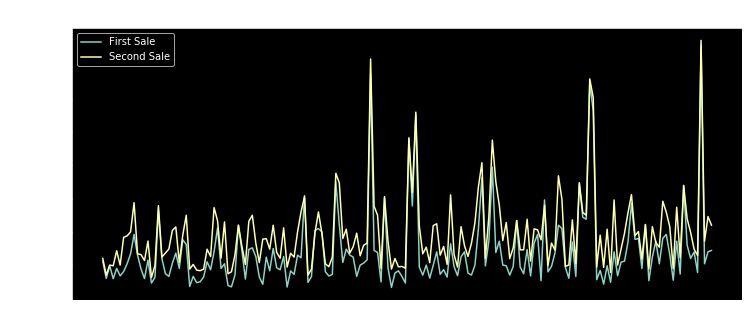

Average price increase on resell: 138.77 %


In [18]:
sns.set_style({'axes.grid':False})

prices = dups.groupby('id')['price']
plt.figure(figsize=(12,5))
sns.lineplot(range(len(prices)), prices.first(), label='First Sale')
sns.lineplot(range(len(prices)), prices.last(), label='Second Sale')
plt.title('Sale price difference for repeat sellers', fontdict={'fontsize':20})
plt.legend()
plt.show()

print('Average price increase on resell:', 
      round(prices.last().mean()/prices.first().mean() * 100, 2),'%')

That is quite an average increase on resold houses... there must have been something going on there. At the very least, this shows that people are successfully flipping houses in King County, whether what they are doing officially qualifies as renovation or not, there are clearly ways of profiting off of reselling houses.

## Now we need to deal with the date. Housing markets may fluctuate with the time of year, so this may prove to be a valuable predictor.

In [19]:
#This is a block of code to turn the date into a dummy variables representing seasons
#I was hoping to have this come out as a comparison in the coefficients to see which
#seasons were the best for selling your home, but they were barely statistically significant
#so I decided to do them as continuous datetime variables instead.

#df['month'] = df['date'].map(lambda x: x.split('/')[0])
#df['month'] = df['month'].astype('int64')
#date_bins = [0,3,6,9,12]
#bins_month = pd.cut(df['month'], date_bins)
#month_codes = bins_month.cat.codes
#seasons = pd.get_dummies(month_codes, prefix='season', drop_first=False)
#seasons.rename(columns={'season_0':'winter','season_1':'spring','season_2':'summer',
#                       'season_3':'fall'},inplace=True)
#df.drop(columns=['date','month'],inplace=True)
#df = pd.concat([df, seasons],axis=1)
#df.head()

In [20]:
df.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [21]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'] = df.date.map(dt.datetime.toordinal)
df.date.head()

0    735519
1    735576
2    735654
3    735576
4    735647
Name: date, dtype: int64

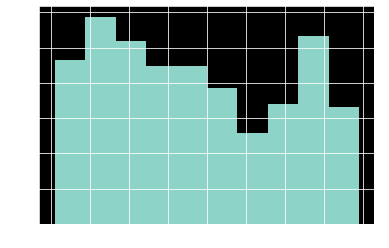

In [22]:
df.date.hist()

# Now to deal with the 'yr_renovated' feature

In [23]:
df.yr_renovated.isnull().sum()

3842

## That's a lot of missing values
- I am going to start by making the assumption that houses with no data for renovation are probably not renovated, and replace all of these values with zeroes.

In [24]:
df.yr_renovated.fillna(value=0,inplace=True)
df.yr_renovated.isnull().sum()

0

## Since this makes yr_renovated mostly zeroes, I am going to break it into categories for easier analysis.

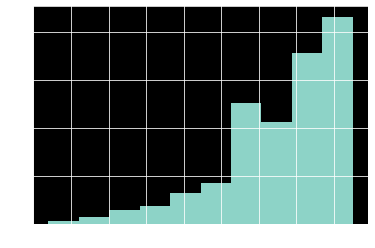

In [25]:
df[df['yr_renovated']>0].yr_renovated.hist();

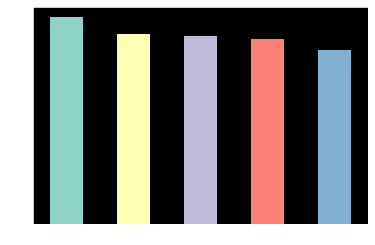

In [26]:
bins = [-1,1,1985,1995,2003,2009,2015]
bins_renovation = pd.cut(df['yr_renovated'], bins)
renovation_codes = bins_renovation.cat.codes
renovation_codes[renovation_codes>0].value_counts().plot(kind='bar')

Correlation between timing of renovation and sale price 0.07088992292572759


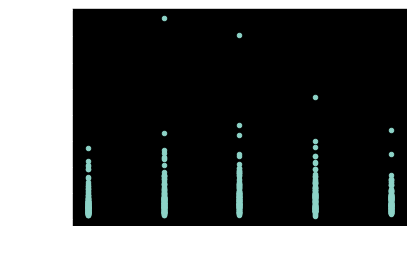

In [27]:
df_check = pd.concat([renovation_codes, df['price']], axis=1)
df_check.rename(columns={0:'renovation'},inplace=True)
df_check.head()

print('Correlation between timing of renovation and sale price',
      df_check[df_check.renovation > 0]['renovation'].corr(df_check[df_check.renovation>0]['price']))
df_check[df_check.renovation > 0].plot.scatter(x='renovation', y='price');
#renovation_dummy = pd.get_dummies(renovation_codes, prefix='renovation', drop_first=True)
#renovation_dummy.head()
#df = df.drop(columns=['yr_renovated'])
#df = pd.concat([df,renovation_dummy],axis=1)
#df.head()

## The plot above does not show a strong correlation between more recent renovations and sales price.
This means that we can just turn 'yr_renovated' into a binary variable which represents whether or not a house has been renovated at all.

In [28]:
bins = [-1, 1, df.yr_renovated.max()]
labels = ['0','1']
df.yr_renovated = pd.cut(df.yr_renovated, bins, labels=labels)
df.rename(columns={'yr_renovated':'was_renovated'}, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,was_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,735519,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,1951,1,98125,47.7210,-122.319,1690,7639,1
2,5631500400,735654,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,0


## Now to fix Waterfront:
 - I think the best way to deal with the missing values in this column is to replace them with zeroes. I had tried a different way of treating the missing values as a seperate category, but it did not improve model results. It is likely that a house on the waterfront would have that included in it's data.

In [29]:
df.waterfront.fillna(value=0,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
was_renovated    21597 non-null category
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
has_basement     21597 non-null category
dtypes: category(2), float64(7), int64(12)
memory usage: 3.2 MB


### Just a few values to fix in 'view'. I think replacing them with the mode (zero) will be fine since the vast majority of entries are zero, and the reason the data is missing may be because the house was not viewed, which would be a zero.

In [31]:
df.view.fillna(value=0,inplace=True)

In [32]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
yr_built         False
was_renovated    False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
has_basement     False
dtype: bool

## Dealing with Multicolinearity:
Since sqft_living and sqft_above have a correlation score of over .85, I am going to drop one. I chose sqft_above because I believe sqft_living is more descriptive.

In [33]:
print('Correlation of sqft_living and sqft_above', df.sqft_living.corr(df.sqft_above))

Correlation of sqft_living and sqft_above 0.8764477590354981


In [34]:
df.drop(columns=['sqft_above'],inplace=True)

# Exploratory Data Analysis:

### The first thing I'd like to do is remove outliers, which will make feature comparison easier and improve the performance of the regression model.

In [35]:
sns.set_style({'axes.grid':True})

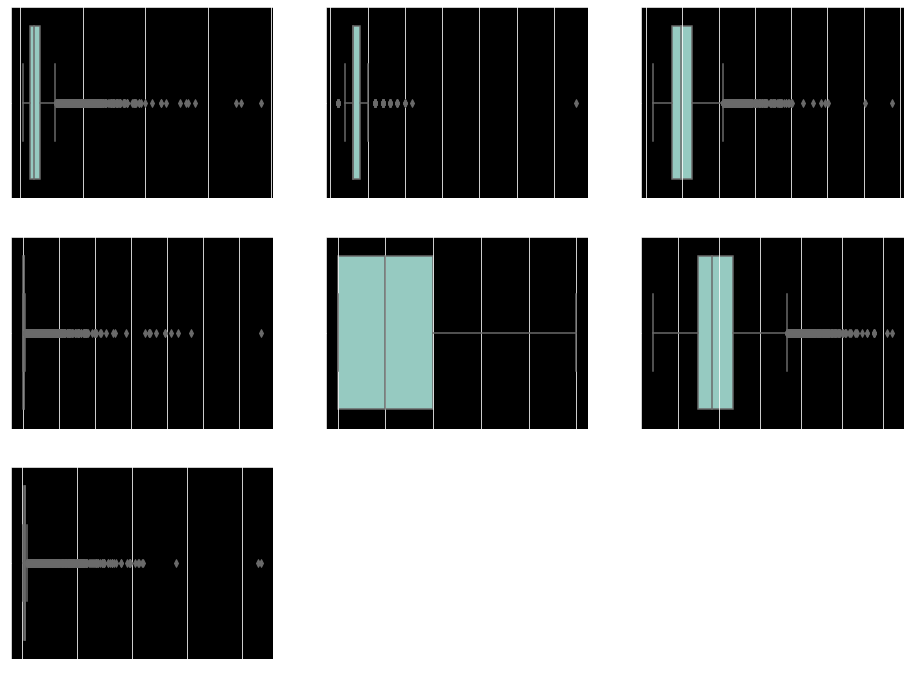

In [36]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.bedrooms)
plt.subplot(333)
sns.boxplot(df.sqft_living)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.floors)
plt.subplot(336)
sns.boxplot(df.sqft_living15)
plt.subplot(337)
sns.boxplot(df.sqft_lot15)

In [37]:
print('Size of original dataset:',len(df))
df2 = df.copy()
df2 = df2[df2.price < 4000000]
df2 = df2[df2.bedrooms < 10]
df2 = df2[df2.sqft_living < 8000]
df2 = df2[df2.sqft_lot < 500000]
print('Size of trimmed dataset:',len(df2))

Size of original dataset: 21597
Size of trimmed dataset: 21556


## How does location affect price?

In [38]:
print('Min lat:',df2.lat.min())
print('Max lat:',df2.lat.max())
print('Min long:',df2.long.min())
print('Max long:',df2.long.max())

Min lat: 47.1559
Max lat: 47.7776
Min long: -122.51899999999999
Max long: -121.315


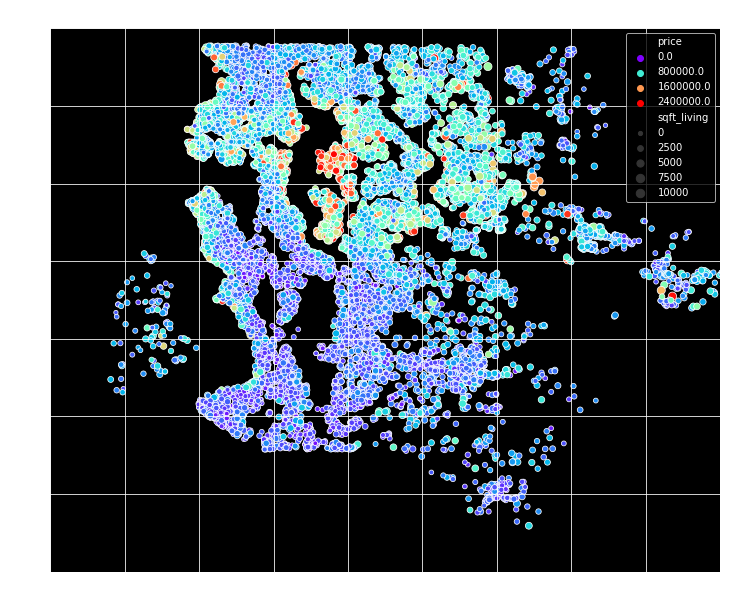

In [39]:
map_df = df2[df2['price'] < 2000000]
plt.figure(figsize=(12,10))
sns.scatterplot(map_df.long, map_df.lat, hue=map_df.price, size=map_df.sqft_living, palette='rainbow')
plt.xlim(-122.6,-121.7)
plt.ylim(47.1,47.8)
plt.title('Locations vs Price', fontdict={'fontsize':20})
plt.show()

# Setting up Categorical Variables

In [313]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21556 entries, 0 to 21596
Data columns (total 20 columns):
id               21556 non-null int64
date             21556 non-null int64
price            21556 non-null float64
bedrooms         21556 non-null int64
bathrooms        21556 non-null float64
sqft_living      21556 non-null int64
sqft_lot         21556 non-null int64
floors           21556 non-null float64
waterfront       21556 non-null float64
view             21556 non-null float64
condition        21556 non-null int64
grade            21556 non-null int64
yr_built         21556 non-null int64
was_renovated    21556 non-null category
zipcode          21556 non-null int64
lat              21556 non-null float64
long             21556 non-null float64
sqft_living15    21556 non-null int64
sqft_lot15       21556 non-null int64
has_basement     21556 non-null category
dtypes: category(2), float64(7), int64(11)
memory usage: 3.2 MB


In [314]:
for_encoding = ['waterfront','was_renovated','has_basement','zipcode']

for col in for_encoding:
    df2[col] = df2[col].astype('category')
    dummy = pd.get_dummies(df2[col], prefix=col, drop_first=True)
    df2 = pd.concat([df2, dummy], axis=1)
    df2.drop(columns=[col], inplace=True)

In [315]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21556 entries, 0 to 21596
Data columns (total 88 columns):
id                 21556 non-null int64
date               21556 non-null int64
price              21556 non-null float64
bedrooms           21556 non-null int64
bathrooms          21556 non-null float64
sqft_living        21556 non-null int64
sqft_lot           21556 non-null int64
floors             21556 non-null float64
view               21556 non-null float64
condition          21556 non-null int64
grade              21556 non-null int64
yr_built           21556 non-null int64
lat                21556 non-null float64
long               21556 non-null float64
sqft_living15      21556 non-null int64
sqft_lot15         21556 non-null int64
waterfront_1.0     21556 non-null uint8
was_renovated_1    21556 non-null uint8
has_basement_1     21556 non-null uint8
zipcode_98002      21556 non-null uint8
zipcode_98003      21556 non-null uint8
zipcode_98004      21556 non-null uint8

## Just a quick and dirty regression to see where we're at:

In [316]:
data = df2.drop(columns=['price','id'])
target = df2['price']

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [318]:
linreg.score(X_test, y_test)

0.8122362444180503

# Now we are ready for recursive feature selection:

### Starting with Forward Backward selection:

In [319]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [320]:
df2.rename(columns={'waterfront_1.0':'waterfront_1'},inplace=True)

In [321]:
data = df2.drop(columns=['price','id'])
target = df2['price']

In [322]:
included = stepwise_selection(data, target)
selected = data[included]
selected.head()

Add  zipcode_98004                  with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  lat                            with p-value 0.0
Add  waterfront_1                   with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98039                  with p-value 1.30427e-268
Add  view                           with p-value 6.89637e-228
Add  zipcode_98112                  with p-value 8.83826e-208
Add  zipcode_98040                  with p-value 3.26047e-211
Add  zipcode_98033                  with p-value 2.90384e-67
Add  bedrooms                       with p-value 1.17541e-67
Add  zipcode_98105                  with p-value 8.67506e-69
Add  zipcode_98119                  with p-value 8.75107e-61
Add  zipcode_98199                  with p-value 1.75845e-51
Add  zipcode_98109     

C:\Users\indez\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  zipcode_98075                  with p-value 5.57535e-05
Drop zipcode_98125                  with p-value 0.225742
Add  zipcode_98146                  with p-value 0.000592077
Drop zipcode_98034                  with p-value 0.301262
Add  sqft_lot15                     with p-value 0.00627079
Add  zipcode_98038                  with p-value 0.00829675
Add  zipcode_98074                  with p-value 0.00706718
Add  zipcode_98045                  with p-value 0.00704669
Add  zipcode_98053                  with p-value 0.00693578
Add  zipcode_98024                  with p-value 0.00753783


,zipcode_98004,sqft_living15,lat,waterfront_1,grade,yr_built,bathrooms,sqft_living,zipcode_98039,view,...,zipcode_98106,zipcode_98052,zipcode_98075,zipcode_98146,sqft_lot15,zipcode_98038,zipcode_98074,zipcode_98045,zipcode_98053,zipcode_98024
0,0,1340,47.5112,0,7,1955,1.00,1180,0,0.0,...,0,0,0,0,5650,0,0,0,0,0
1,0,1690,47.7210,0,7,1951,2.25,2570,0,0.0,...,0,0,0,0,7639,0,0,0,0,0
2,0,2720,47.7379,0,6,1933,1.00,770,0,0.0,...,0,0,0,0,8062,0,0,0,0,0
3,0,1360,47.5208,0,7,1965,3.00,1960,0,0.0,...,0,0,0,0,5000,0,0,0,0,0
4,0,1800,47.6168,0,8,1987,2.00,1680,0,0.0,...,0,0,0,0,7503,0,1,0,0,0


In [323]:
from statsmodels.formula.api import ols

outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1522.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:08:47   Log-Likelihood:            -2.8713e+05
No. Observations:               21556   AIC:                         5.744e+05
Df Residuals:                   21491   BIC:                         5.749e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.14e+08   6.62e+06    -17.231      0.000   -1.27e+08   -1.01e+08
zipcode_98004    6.091e+05   8897.137     68.459      0.000    5.92e+05    6.27e+05
sqft_living15      26.1487      2.622      9.972      0.000      21.009      31.289
lat              5.478e+05   1.27e+04     43.240      0.000    5.23e+05    5.73e+05
waterfront_1     6.143e+05   1.37e+04     44.975      0.000    5.88e+05    6.41e+05
grade            6.517e+04   1643.955     39.644      0.000     6.2e+04    6.84e+04
yr_built         -779.3161     57.726    -13.500      0.000    -892.464    -666.169
bathrooms        2.417e+04   2439.661      9.906      0.000    1.94e+04    2.89e+04
sqft_living       164.7037      2.625     62.745      0.000     159.559     169.849
zipcode_98039    1.044e+06   2.19e+04     47.705      0.000       1e+06    1.09e+06
view             5.488e+04   1580.158     34.732      0.000    5.18e+04     5.8e+04
zipcode_98112    4.701e+05   9821.701     47.861      0.000    4.51e+05    4.89e+05
zipcode_98040     3.85e+05   9319.812     41.309      0.000    3.67e+05    4.03e+05
zipcode_98033    1.823e+05   7847.496     23.231      0.000    1.67e+05    1.98e+05
bedrooms        -2.237e+04   1488.712    -15.029      0.000   -2.53e+04   -1.95e+04
zipcode_98105    2.982e+05   1.05e+04     28.413      0.000    2.78e+05    3.19e+05
zipcode_98119     3.19e+05   1.16e+04     27.589      0.000    2.96e+05    3.42e+05
zipcode_98199    2.257e+05   8962.053     25.183      0.000    2.08e+05    2.43e+05
zipcode_98109    3.381e+05   1.46e+04     23.079      0.000    3.09e+05    3.67e+05
zipcode_98006    1.427e+05   7197.823     19.831      0.000    1.29e+05    1.57e+05
zipcode_98155   -7.644e+04   8092.073     -9.446      0.000   -9.23e+04   -6.06e+04
zipcode_98028   -1.016e+05   9680.197    -10.498      0.000   -1.21e+05   -8.26e+04
zipcode_98133   -4.485e+04   7713.406     -5.815      0.000      -6e+04   -2.97e+04
zipcode_98019   -1.177e+05   1.15e+04    -10.202      0.000    -1.4e+05   -9.51e+04
zipcode_98011   -9.775e+04   1.14e+04     -8.606      0.000    -1.2e+05   -7.55e+04
zipcode_98102     3.13e+05   1.51e+04     20.711      0.000    2.83e+05    3.43e+05
zipcode_98072   -6.727e+04   9880.300     -6.809      0.000   -8.66e+04   -4.79e+04
condition        2.668e+04   1743.748     15.300      0.000    2.33e+04    3.01e+04
zipcode_98077   -9.227e+04   1.15e+04     -8.029      0.000   -1.15e+05   -6.97e+04
date              121.0992      8.942     13.543      0.000     103.572     138.626
has_basement_1  -4.821e+04   2576.178    -18.713      0.000   -5.33e+04   -4.32e+04
zipcode_98178   -3.941e+04   9386.406     -4.199      0.000   -5.78e+04    -2.1e+04
zipcode_98014   -6.452e+04   1.42e+04     -4.555      0.000   -9.23e+04   -3.68e+04
zipcode_98022    6.006e+04   1.06e+04      5.671      0.000

# Now to transform the target variable:

In [324]:
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

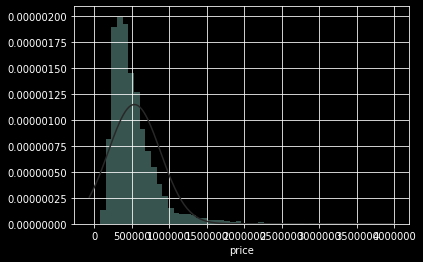

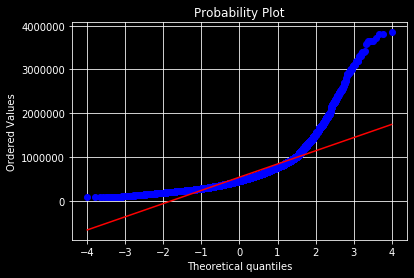

In [325]:
sns.distplot(target, fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(target, plot=plt)

In [326]:
target.skew()

2.960903436443815

In [327]:
target2 = np.log(target)

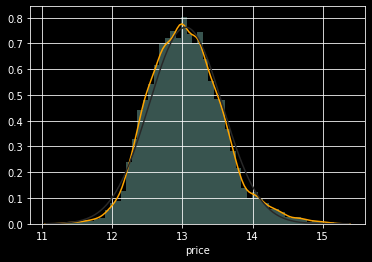

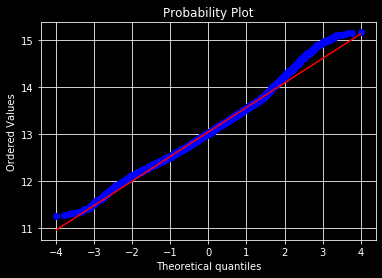

In [328]:
sns.distplot(target2, fit=norm, bins=50, kde_kws={'color':'orange'});
fig = plt.figure()
res = stats.probplot(target2, plot=plt)

In [329]:
target2.skew()

0.3870014685898396

## We can see the distribution of the target data has benefitted dramatically from log transformation

In [330]:
included = stepwise_selection(data, target2)
selected = data[included]
selected.head()

Add  sqft_living15                  with p-value 0.0
Add  lat                            with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  sqft_living                    with p-value 1.85922e-249
Add  zipcode_98004                  with p-value 7.29003e-239
Add  view                           with p-value 4.83933e-245
Add  zipcode_98155                  with p-value 1.97123e-135
Add  zipcode_98133                  with p-value 3.55956e-121
Add  zipcode_98040                  with p-value 3.34492e-124
Add  zipcode_98028                  with p-value 3.06782e-113
Add  zipcode_98112                  with p-value 8.47263e-111
Add  condition                      with p-value 4.58017e-96
Add  zipcode_98019                  with p-value 7.4141e-90
Add  waterfront_1                   with p-value 4.96533e-86
Add  zipcode_98168                  with p-value 7.40732e

,sqft_living15,lat,grade,yr_built,bathrooms,sqft_living,zipcode_98004,view,zipcode_98155,zipcode_98133,...,zipcode_98075,zipcode_98003,zipcode_98005,zipcode_98029,long,zipcode_98027,zipcode_98166,zipcode_98107,zipcode_98144,zipcode_98092
0,1340,47.5112,7,1955,1.00,1180,0,0.0,0,0,...,0,0,0,0,-122.257,0,0,0,0,0
1,1690,47.7210,7,1951,2.25,2570,0,0.0,0,0,...,0,0,0,0,-122.319,0,0,0,0,0
2,2720,47.7379,6,1933,1.00,770,0,0.0,0,0,...,0,0,0,0,-122.233,0,0,0,0,0
3,1360,47.5208,7,1965,3.00,1960,0,0.0,0,0,...,0,0,0,0,-122.393,0,0,0,0,0
4,1800,47.6168,8,1987,2.00,1680,0,0.0,0,0,...,0,0,0,0,-122.045,0,0,0,0,0


In [331]:
outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target2], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     2056.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:13:36   Log-Likelihood:                 5783.8
No. Observations:               21556   AIC:                        -1.142e+04
Df Residuals:                   21482   BIC:                        -1.083e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -242.9958      8.561    -28.383      0.000    -259.776    -226.215
sqft_living15    8.589e-05    3.3e-06     26.006      0.000    7.94e-05    9.24e-05
lat                 1.8445      0.022     82.372      0.000       1.801       1.888
grade               0.0973      0.002     47.251      0.000       0.093       0.101
yr_built           -0.0006   6.92e-05     -9.387      0.000      -0.001      -0.001
bathrooms           0.0396      0.003     13.564      0.000       0.034       0.045
sqft_living         0.0002   3.08e-06     58.633      0.000       0.000       0.000
zipcode_98004       0.4475      0.011     40.240      0.000       0.426       0.469
view                0.0567      0.002     28.534      0.000       0.053       0.061
zipcode_98155      -0.4908      0.010    -48.941      0.000      -0.510      -0.471
zipcode_98133      -0.4370      0.010    -45.889      0.000      -0.456      -0.418
zipcode_98040       0.2965      0.012     25.226      0.000       0.273       0.320
zipcode_98028      -0.4845      0.012    -39.792      0.000      -0.508      -0.461
zipcode_98112       0.3238      0.012     27.086      0.000       0.300       0.347
condition           0.0586      0.002     26.642      0.000       0.054       0.063
zipcode_98019      -0.5060      0.016    -32.253      0.000      -0.537      -0.475
waterfront_1        0.4764      0.017     27.796      0.000       0.443       0.510
zipcode_98168      -0.3533      0.012    -29.348      0.000      -0.377      -0.330
zipcode_98011      -0.4492      0.014    -31.256      0.000      -0.477      -0.421
zipcode_98034      -0.2950      0.009    -32.044      0.000      -0.313      -0.277
zipcode_98072      -0.3970      0.013    -31.185      0.000      -0.422      -0.372
zipcode_98077      -0.4287      0.015    -28.668      0.000      -0.458      -0.399
zipcode_98125      -0.2858      0.010    -28.372      0.000      -0.306      -0.266
zipcode_98177      -0.3100      0.013    -24.603      0.000      -0.335      -0.285
zipcode_98178      -0.2989      0.012    -24.912      0.000      -0.322      -0.275
zipcode_98022       0.1621      0.015     11.046      0.000       0.133       0.191
zipcode_98039       0.5694      0.027     20.768      0.000       0.516       0.623
zipcode_98014      -0.3916      0.019    -20.444      0.000      -0.429      -0.354
sqft_lot         8.614e-07   4.37e-08     19.713      0.000    7.76e-07    9.47e-07
date                0.0002   1.12e-05     18.649      0.000       0.000       0.000
zipcode_98116       0.1448      0.011     13.123      0.000       0.123       0.166
zipcode_98119       0.2357      0.014     16.548      0.000       0.208       0.264
zipcode_98136       0.1340      0.012     10.944      0.000       0.110       0.158
zipcode_98053      -0.1489      0.011    -13.299      0.000

### That improved the model accuracy dramatically.

## I am going to make a loop which tries to optimize the transformation options for independent variables.

In [332]:
first_score = .875
best_score = first_score
selected2 = selected.copy()
for var in list(selected2.columns):
    print(f'Testing {var}')
    #Check to make sure log transforms not applied to variables with zeroes
    if selected2[var].min() > 0:
        df8 = selected2.copy()
        df8[var] = np.log(selected2[var])
        outcome = 'price'
        pred_sum = '+'.join(df8.columns)
        formula = outcome + '~' + pred_sum
        model = ols(formula=formula, data=pd.concat([df8, target2], axis=1)).fit()
        new_score_log = model.rsquared
    else:
        new_score_log = 0
    
    if selected2[var].min() >= 0:
        df3 = selected2.copy()
        df3[var] = np.sqrt(selected2[var])
        outcome = 'price'
        pred_sum = '+'.join(df3.columns)
        formula = outcome + '~' + pred_sum
        model = ols(formula=formula, data=pd.concat([df3, target2], axis=1)).fit()
        new_score_sqrt = model.rsquared
    
    print(f'Score for log transform: {new_score_log}')
    print(f'Score for sqrt transform: {new_score_sqrt}')
    
    if new_score_sqrt >= new_score_log:
        new_score = new_score_sqrt
        transform = 'sqrt'
    else:
        new_score = new_score_log
        transform = 'log'
        
    if new_score > best_score:
        best_score = new_score
        if transform == 'sqrt':
            selected2[var] = df3[var]
            print(f'Applied {transform} transformation to {var}')
        elif transform == 'log':
            selected2[var] = df8[var]
            print(f'Applied {transform} transformation to {var}')
        else:
            print('something went wrong')
            

outcome = 'price'
pred_sum = '+'.join(selected2.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=pd.concat([selected2, target2], axis=1)).fit()
model.summary()
    

Testing sqft_living15
Score for log transform: 0.8766217434388484
Score for sqrt transform: 0.8758779516172558
Applied log transformation to sqft_living15
Testing lat
Score for log transform: 0.876636256412521
Score for sqrt transform: 0.8766290270530201
Applied log transformation to lat
Testing grade
Score for log transform: 0.8769799595545644
Score for sqrt transform: 0.87696138353131
Applied log transformation to grade
Testing yr_built
Score for log transform: 0.8769965456237089
Score for sqrt transform: 0.8769882643848343
Applied log transformation to yr_built
Testing bathrooms
Score for log transform: 0.8772329541243712
Score for sqrt transform: 0.8771667131374979
Applied log transformation to bathrooms
Testing sqft_living
Score for log transform: 0.8758671118647574
Score for sqrt transform: 0.8787587189657078
Applied sqrt transformation to sqft_living
Testing zipcode_98004
Score for log transform: 0
Score for sqrt transform: 0.8787587189657078
Testing view
Score for log transform

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     2163.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:14:56   Log-Likelihood:                 6260.5
No. Observations:               21556   AIC:                        -1.237e+04
Df Residuals:                   21482   BIC:                        -1.178e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -525.4388      9.301    -56.492      0.000    -543.670    -507.208
sqft_living15       0.1533      0.007     23.428      0.000       0.141       0.166
lat                93.0832      1.061     87.748      0.000      91.004      95.162
grade               0.7235      0.015     47.123      0.000       0.693       0.754
yr_built           -0.6932      0.140     -4.965      0.000      -0.967      -0.420
bathrooms           0.0559      0.006     10.010      0.000       0.045       0.067
sqft_living         0.0186      0.000     64.939      0.000       0.018       0.019
zipcode_98004       0.4439      0.011     40.814      0.000       0.423       0.465
view                0.0619      0.002     32.039      0.000       0.058       0.066
zipcode_98155      -0.5332      0.010    -53.550      0.000      -0.553      -0.514
zipcode_98133      -0.4624      0.009    -49.304      0.000      -0.481      -0.444
zipcode_98040       0.3010      0.011     26.250      0.000       0.279       0.323
zipcode_98028      -0.5428      0.012    -45.140      0.000      -0.566      -0.519
zipcode_98112       0.3570      0.012     30.380      0.000       0.334       0.380
condition           0.1854      0.008     24.211      0.000       0.170       0.200
zipcode_98019      -0.5396      0.015    -35.059      0.000      -0.570      -0.509
waterfront_1        0.4758      0.017     28.378      0.000       0.443       0.509
zipcode_98168      -0.3521      0.012    -29.814      0.000      -0.375      -0.329
zipcode_98011      -0.5012      0.014    -35.476      0.000      -0.529      -0.474
zipcode_98034      -0.3329      0.009    -36.625      0.000      -0.351      -0.315
zipcode_98072      -0.4532      0.013    -35.826      0.000      -0.478      -0.428
zipcode_98077      -0.4673      0.015    -31.492      0.000      -0.496      -0.438
zipcode_98125      -0.3115      0.010    -31.481      0.000      -0.331      -0.292
zipcode_98177      -0.3584      0.012    -28.869      0.000      -0.383      -0.334
zipcode_98178      -0.2957      0.012    -25.199      0.000      -0.319      -0.273
zipcode_98022       0.2009      0.014     14.017      0.000       0.173       0.229
zipcode_98039       0.5881      0.027     21.942      0.000       0.536       0.641
zipcode_98014      -0.4050      0.019    -21.538      0.000      -0.442      -0.368
sqft_lot            0.0524      0.002     26.546      0.000       0.048       0.056
date                0.0002    1.1e-05     19.238      0.000       0.000       0.000
zipcode_98116       0.1567      0.011     14.505      0.000       0.136       0.178
zipcode_98119       0.2572      0.014     18.405      0.000       0.230       0.285
zipcode_98136       0.1469      0.012     12.260      0.000       0.123       0.170
zipcode_98053      -0.1707      0.011    -15.516      0.000

In [333]:
from sklearn.metrics import mean_squared_error

In [334]:
X_train, X_test, y_train, y_test = train_test_split(selected2, target2, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('R_squared',linreg.score(X_test,y_test))
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

R_squared 0.8780230155563059
Train MSE: 0.03247067881803094
Test MSE: 0.03377613860807452


### As can be seen in the cells above, the R squared did increase somewhat by transforming independent variables, but not enough to justify making the analysis more complicated by obfuscating the scale of the variables. I am going to standardize them instead so that the coefficients can be compared:

# Standardization:

In [242]:
def standardize(x):
    return((x-np.mean(x))/np.sqrt(np.var(x)))

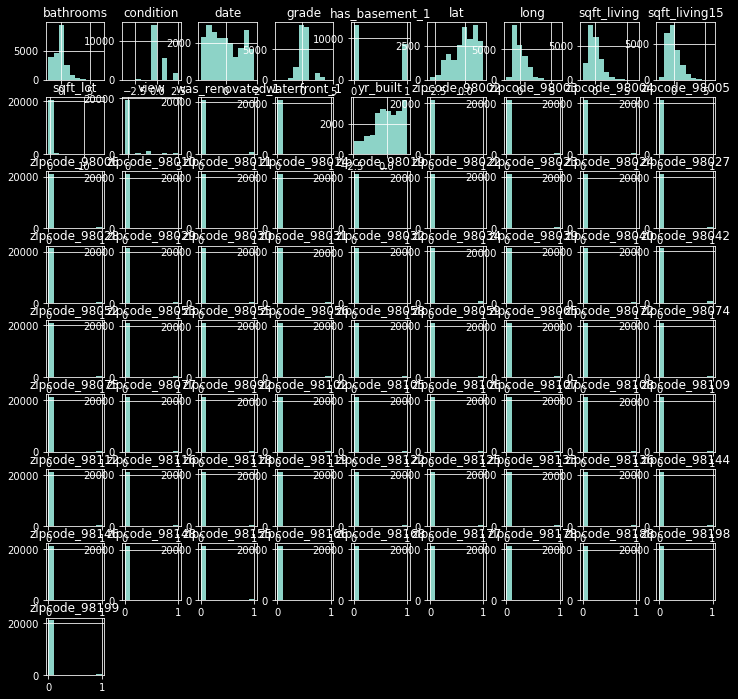

In [338]:
for_standardize = ['bathrooms','condition','date','grade','lat','long',
                   'sqft_living','sqft_living15','sqft_lot','view', 'yr_built',
                   #'sqft_lot15',
                   #'floors',
                   #'zipcode',
                   #'bedrooms'
                  ]
selected3 = selected.copy()
for var in for_standardize:
    selected3[var] = standardize(selected3[var])
    
selected3.hist(figsize=(12,12));

In [339]:
outcome = 'price'
pred_sum = '+'.join(selected3.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=pd.concat([selected3, target2], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     2056.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:19:28   Log-Likelihood:                 5783.8
No. Observations:               21556   AIC:                        -1.142e+04
Df Residuals:                   21482   BIC:                        -1.083e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.1289      0.003   4203.183      0.000      13.123      13.135
sqft_living15       0.0587      0.002     26.006      0.000       0.054       0.063
lat                 0.2555      0.003     82.372      0.000       0.249       0.262
grade               0.1135      0.002     47.251      0.000       0.109       0.118
yr_built           -0.0191      0.002     -9.387      0.000      -0.023      -0.015
bathrooms           0.0302      0.002     13.564      0.000       0.026       0.035
sqft_living         0.1621      0.003     58.633      0.000       0.157       0.167
zipcode_98004       0.4475      0.011     40.240      0.000       0.426       0.469
view                0.0432      0.002     28.534      0.000       0.040       0.046
zipcode_98155      -0.4908      0.010    -48.941      0.000      -0.510      -0.471
zipcode_98133      -0.4370      0.010    -45.889      0.000      -0.456      -0.418
zipcode_98040       0.2965      0.012     25.226      0.000       0.273       0.320
zipcode_98028      -0.4845      0.012    -39.792      0.000      -0.508      -0.461
zipcode_98112       0.3238      0.012     27.086      0.000       0.300       0.347
condition           0.0381      0.001     26.642      0.000       0.035       0.041
zipcode_98019      -0.5060      0.016    -32.253      0.000      -0.537      -0.475
waterfront_1        0.4764      0.017     27.796      0.000       0.443       0.510
zipcode_98168      -0.3533      0.012    -29.348      0.000      -0.377      -0.330
zipcode_98011      -0.4492      0.014    -31.256      0.000      -0.477      -0.421
zipcode_98034      -0.2950      0.009    -32.044      0.000      -0.313      -0.277
zipcode_98072      -0.3970      0.013    -31.185      0.000      -0.422      -0.372
zipcode_98077      -0.4287      0.015    -28.668      0.000      -0.458      -0.399
zipcode_98125      -0.2858      0.010    -28.372      0.000      -0.306      -0.266
zipcode_98177      -0.3100      0.013    -24.603      0.000      -0.335      -0.285
zipcode_98178      -0.2989      0.012    -24.912      0.000      -0.322      -0.275
zipcode_98022       0.1621      0.015     11.046      0.000       0.133       0.191
zipcode_98039       0.5694      0.027     20.768      0.000       0.516       0.623
zipcode_98014      -0.3916      0.019    -20.444      0.000      -0.429      -0.354
sqft_lot            0.0276      0.001     19.713      0.000       0.025       0.030
date                0.0237      0.001     18.649      0.000       0.021       0.026
zipcode_98116       0.1448      0.011     13.123      0.000       0.123       0.166
zipcode_98119       0.2357      0.014     16.548      0.000       0.208       0.264
zipcode_98136       0.1340      0.012     10.944      0.000       0.110       0.158
zipcode_98053      -0.1489      0.011    -13.299      0.000

In [341]:
model.params.head()

Intercept        13.128939
sqft_living15     0.058702
lat               0.255510
grade             0.113530
yr_built         -0.019071
dtype: float64

In [349]:
coefficients = model.params.drop(index=['Intercept'])
for index, value in coefficients.items():
    if index.startswith('zipcode'):
        coefficients.drop(index=[index], inplace=True)

coefficients.head()

sqft_living15    0.058702
lat              0.255510
grade            0.113530
yr_built        -0.019071
bathrooms        0.030162
dtype: float64

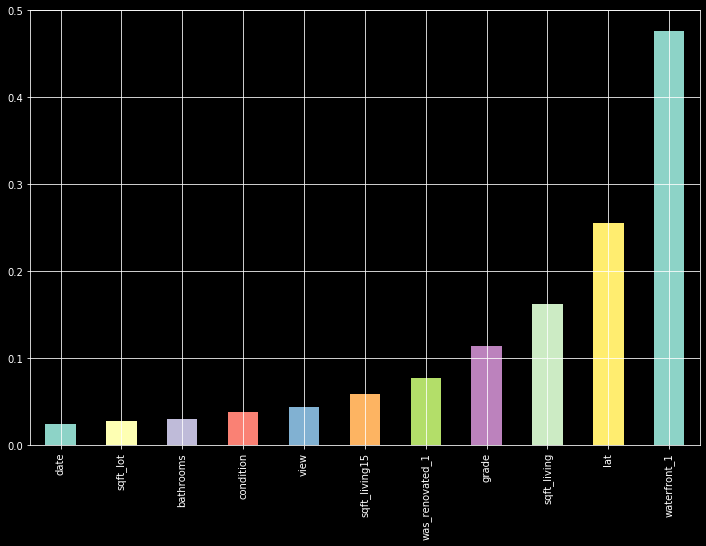

In [352]:
coefficients.sort_values().tail(11).plot(kind='bar', figsize=(12,8))

# A look at Cross Validation, residuals, and model fit:

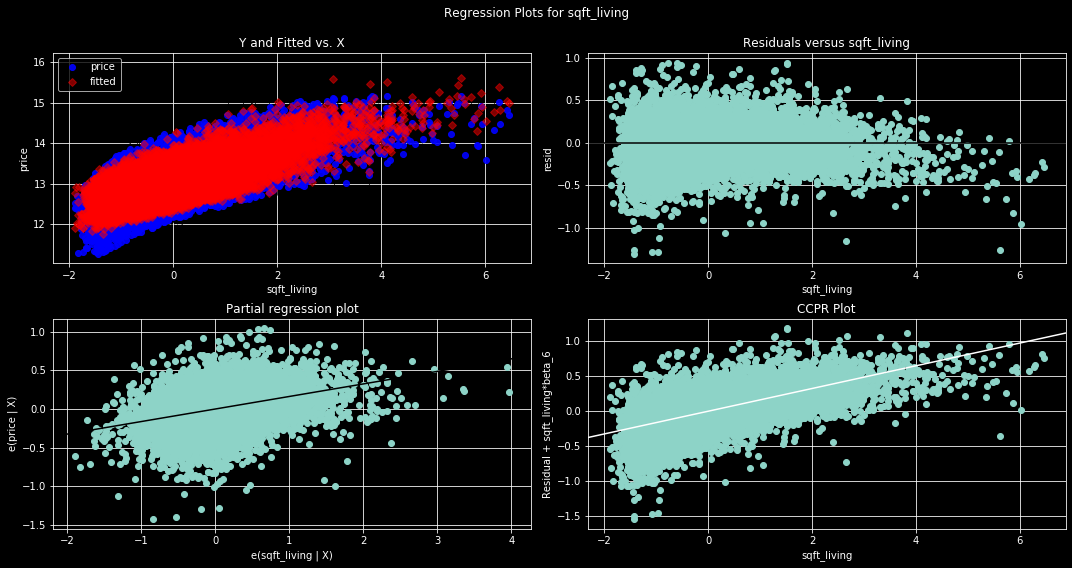

In [353]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living',fig=fig)
plt.show()

C:\Users\indez\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


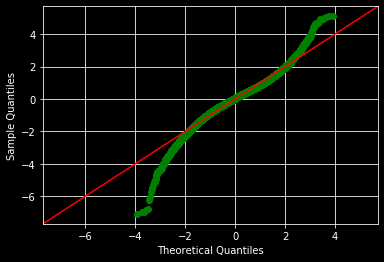

In [354]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45',fit=True, color='g')
fig.show()

In [355]:
import statsmodels.stats.api as sms

In [356]:
name=['Jarque-Bera','Prob','Skew','Kurtosis']
test= sms.jarque_bera(model.resid)
list(zip(name,test))

[('Jarque-Bera', 6711.26228450028),
 ('Prob', 0.0),
 ('Skew', -0.3367341403952485),
 ('Kurtosis', 5.649267761936379)]

In [357]:
from sklearn.model_selection import cross_val_score

r2_results = cross_val_score(linreg, selected, target2, cv=5, scoring="r2")
mse_results = cross_val_score(linreg, selected, target2, cv=5, scoring="neg_mean_squared_error")

print('Cross Validation R2 results:',r2_results)
print('    Average R2:',r2_results.mean())
print('Cross Validation MSE results:',abs(mse_results))
print('    Average MSE:',abs(mse_results.mean()))

Cross Validation R2 results: [0.87181008 0.87013295 0.87074463 0.87827262 0.87364091]
    Average R2: 0.8729202373347926
Cross Validation MSE results: [0.03590978 0.03504691 0.03403742 0.03505759 0.03306384]
    Average MSE: 0.03462310740607763


In [358]:
model.mse_resid

0.034352787862272006

# Conclusions:
 - the features have been standardized, so the coeficients can be analyzed knowing that they should be on relatively the same scale (apart from the categorical variables).
 - the most directly influential feature was 'waterfront', a binary variable telling whether the house is on waterfront property. This makes sense, as waterfront property is almost always more valuable than comparable properties which are landlocked. This could be seen early on when the prices were mapped by lat and long.
 - the grade of the house was a strong predictor of price.
 - latitude had a surprisingly large impact, this indicates that the more valuable houses tend to be on one side of town. Should be looked at with reference to a map, possibly related to waterfront.
 - the renovation variables turned out to make an interesting discovery, in that more recent renovations made the houses more valuable, but the most important factor was whether the house has been renovated since 1995.
 - the yr_built feature actually had a negative correlation to price in the model, this may have something to do with the frequency of renovation between older and newer homes. It should be noted that the newest houses built after 2000 were generally not renovated, seen below.
 - the house square footage and basement square footage were decently strong predictors.
 - the 'date' feature made it into the model after all. Even though the dates were over only one year, housing markets do fluctuate in this time and anyone should take that into consideration when buying or selling a house.
 

## Business Ideas from what the data have shown:
 - Renovation is a key factor in raising a home's value. Showing this using data science could be a good way to get people to buy into renovation of their home in the hopes of getting more value out of their home sale.
 - Grade was another strong predictor of sale price. Understanding how King County grades houses may direct people on what sort of renovations would be most effective in raising their home's value.
 - Interior square footage was one of the most powerful predictors, this can also be increased through renovations.